Taller 2

#1 El ciclo de actividad solar

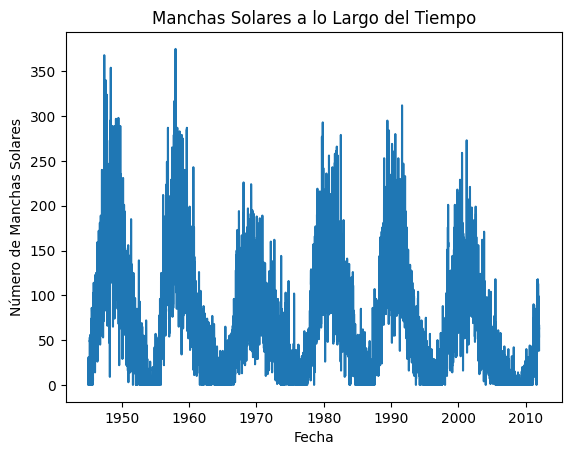

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('datos.dat', sep='\s+', names=['Year', 'Month', 'Day', 'SSN'],skiprows=1)
df['fecha'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.set_index('fecha', inplace=True)
plt.plot(df['SSN'])
plt.xlabel('Fecha')
plt.ylabel('Número de Manchas Solares')
plt.title('Manchas Solares a lo Largo del Tiempo')
plt.show()

#1.1 Perdiodo del ciclo solar

In [62]:
fft_manchas = np.fft.fft(df['SSN'])
frecuencias = np.fft.fftfreq(len(df), d=1)  
indice_fp = np.argmax(np.abs(fft_manchas[1:])) + 1  
fp = frecuencias[indice_fp]
periodo_dias = 1 / fp
periodo_anos = periodo_dias / 365.25 

print(f"La frecuencia principal de la señal es fp = {fp} (1/días)")
print(f"El período del ciclo solar es Pdías = {periodo_dias} días ó Paños = {periodo_anos:.2f} años.")

La frecuencia principal de la señal es fp = -0.0002451781627983001 (1/días)
El período del ciclo solar es Pdías = -4078.6666666666665 días ó Paños = -11.17 años.


#1.2 Reducción de ruido: filtro pasabajas

In [63]:
f = np.fft.fftfreq(len(df))
senal_original = np.fft.fft(df['SSN'])
alpha = 1000
filtro = np.exp(-(f*alpha)**2)
senal_filtrada = senal_original*filtro

1.2 - a).

C:\Users\silva\AppData\Local\Temp\ipykernel_39588\1413186465.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(f), np.log10(np.abs(senal_original)), label='Transformada original', color = "teal")
C:\Users\silva\AppData\Local\Temp\ipykernel_39588\1413186465.py:1: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(f), np.log10(np.abs(senal_original)), label='Transformada original', color = "teal")
C:\Users\silva\AppData\Local\Temp\ipykernel_39588\1413186465.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(f), np.log10(np.abs(senal_filtrada)), label='Transformada filtrada', linestyle='--', color = "coral")
C:\Users\silva\AppData\Local\Temp\ipykernel_39588\1413186465.py:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(f), np.log10(np.abs(senal_filtrada)), label='Transformada filtrada', linestyle='--', color = "coral")


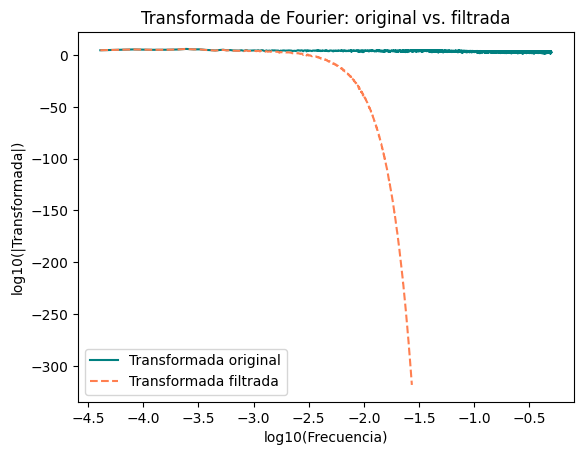

In [64]:
plt.plot(np.log10(f), np.log10(np.abs(senal_original)), label='Transformada original', color = "teal")
plt.plot(np.log10(f), np.log10(np.abs(senal_filtrada)), label='Transformada filtrada', linestyle='--', color = "coral")
plt.xlabel('log10(Frecuencia)')
plt.ylabel('log10(|Transformada|)')
plt.legend()
plt.title('Transformada de Fourier: original vs. filtrada')
plt.show()

1.2 - b).

c:\Users\silva\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


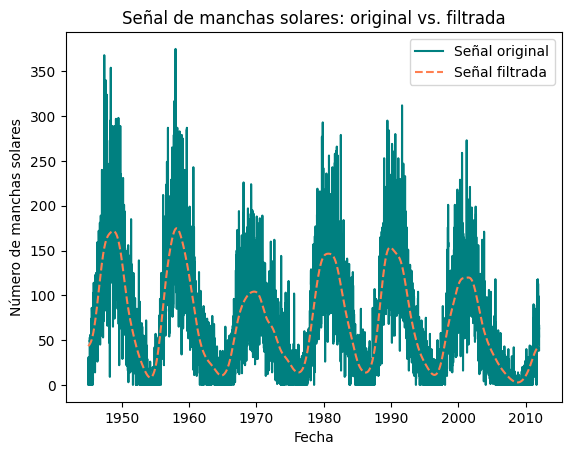

In [65]:
en_tiempo_filtrada = np.fft.ifft(senal_filtrada)
plt.plot(df.index, df['SSN'], label='Señal original', color = "teal")
plt.plot(df.index, en_tiempo_filtrada, label='Señal filtrada', linestyle='--', color = "coral")
plt.xlabel('Fecha')
plt.ylabel('Número de manchas solares')
plt.legend()
plt.title('Señal de manchas solares: original vs. filtrada')
plt.show()

#2

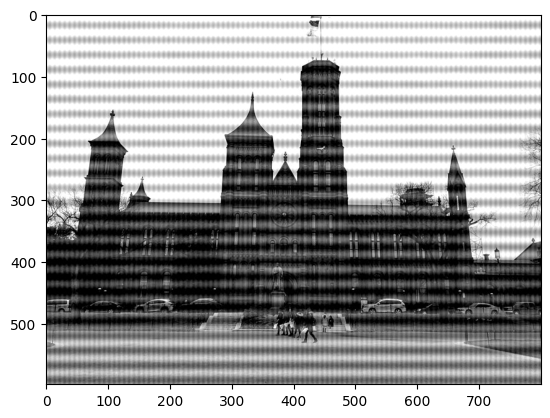

In [66]:
from PIL import Image
import numpy as np
img = np.array(Image.open("imagen.jpg")).astype(float)
plt.imshow(img, cmap='gray')

2.1

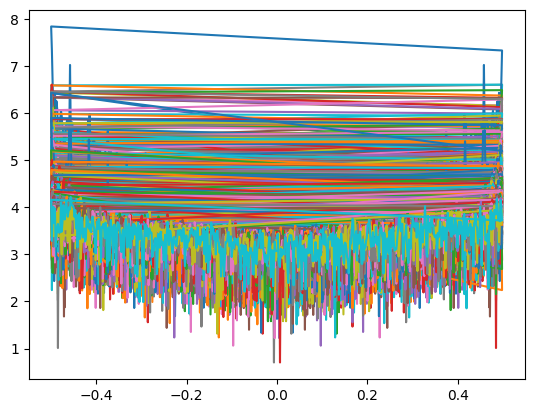

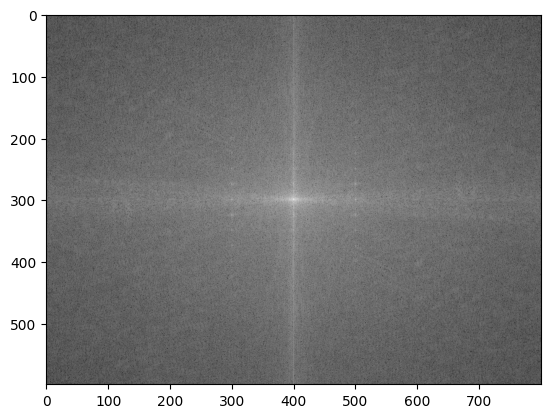

In [67]:
transformada = np.fft.fftshift(np.fft.fft2(img))
f = np.fft.fftfreq(len(img))
plt.plot(f, (np.log10(np.abs(transformada))))
plt.show()
plt.imshow(np.log10(np.abs(transformada)), cmap='gray')

2.2

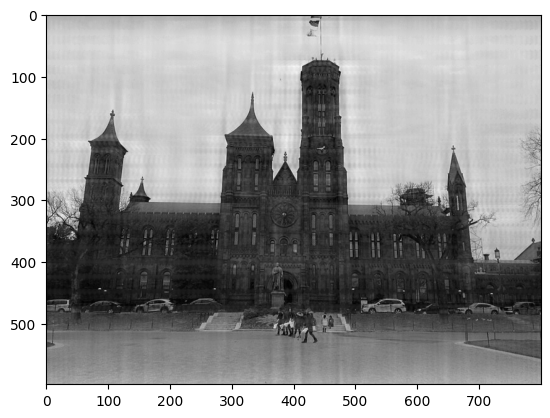

In [68]:
#Borro las 2 líneas externas
posiciones_i = [300,500]  
for i in posiciones_i:
    for j in range(0, 598):
      transformada[j:j+10, i:i+5] = 0
      
#Borro la línea interna excepto el centro
posiciones_i = [400]  
for i in posiciones_i:
    for j in range(0, 285):
      transformada[j:j+10, i:i+5] = 0
    for j in range(305, 598):
      transformada[j:j+10, i:i+5] = 0
      
#Borro línea horizontal NO SIRVE, TOCA?

posiciones_j = [300]  
for j in posiciones_j:
    for i in range(300, 380):
      transformada[j:j+3, i:i+3] = 0
    for i in range(420, 500):
      transformada[j:j+3, i:i+3] = 0


filtered_img = np.fft.ifft2(np.fft.ifftshift(transformada))

# Grafica la imagen filtrada
plt.imshow(np.abs(filtered_img), cmap='gray')

C:\Users\silva\AppData\Local\Temp\ipykernel_39588\860981821.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(transformada)), cmap='gray')


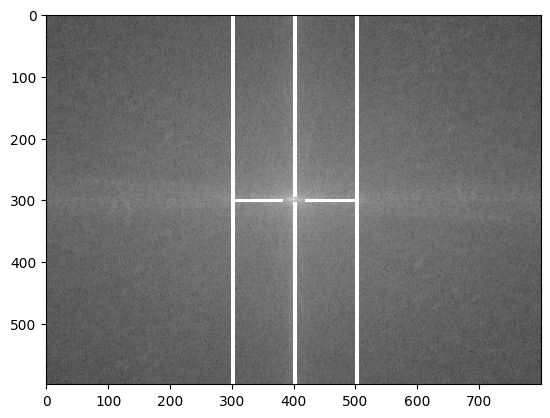

In [69]:
plt.imshow(np.log10(np.abs(transformada)), cmap='gray')